# Bibliotecas

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy

## Cálculo Integral

### Áreas de Funções

O cálculo integral nos ajuda a resolver o problema de calcular a área sob um função. Calcular a área sob uma reta é uma operação trivial, porém como encontrar a área de funções não lineares como a função $f(x) = x^2$? 

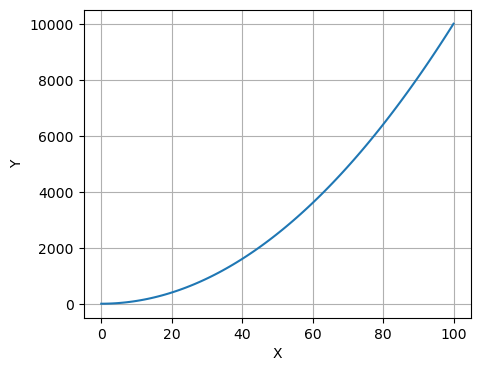

In [92]:
def funcao(x):
    return x**2

plt.figure(figsize=(5,4))

x = np.linspace(0,100,100)

plt.plot(x, funcao(x))

plt.xlabel('X')
plt.ylabel('Y')

plt.grid()

### Área como uma soma de retângulos

Uma forma de cálcular a área sob uma função é aproxima-la como uma soma de retângulos, ao calcular a área dos retângulos à direita e à esquerda teriamos uma banda correspondente a possível área da função. Importante lembrar que a área de um retângulo é igual a: 

$$
A = b . h 
$$

Podemos calcular a área A da região sob o gráfico da função como a soma da área dos retângulos conforme fórmula abaixo: 

$$
A = \lim_{n\to \infty} \ [\ f(x_1) \ \Delta x + f(x_2) \ \Delta x \ + \ ... \ + \ f(x_n) \ \Delta x \ ]
$$

### Ilustração Gráfica: 

In [81]:
x_5 = np.linspace(0,100,5)
x_10 = np.linspace(0,100,10)
x_15 = np.linspace(0,100,15)
x_100 = np.linspace(0,100,100)
x_1000 = np.linspace(0,100,1000)
x_1000000 = np.linspace(0,100,10**5)

x_list = [x_5, x_10, x_15]

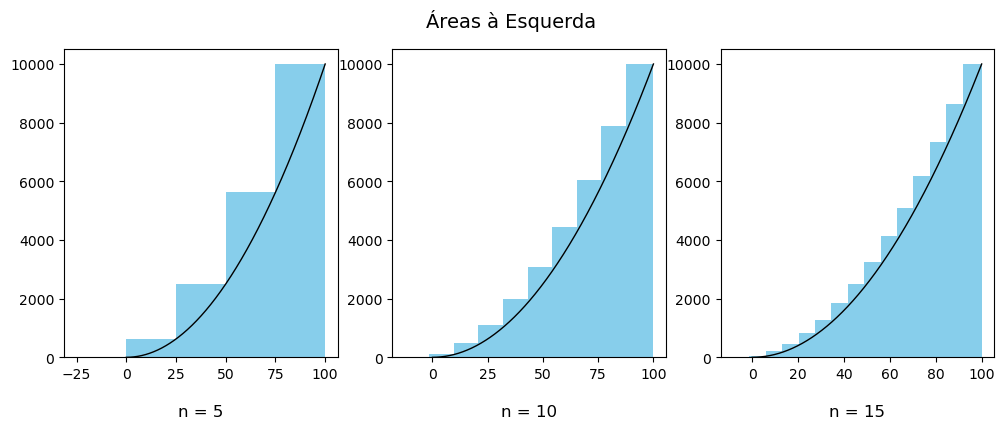

In [82]:
# À esquerda
plt.figure(figsize=(12,4))

plt.suptitle('Áreas à Esquerda \n', fontsize=14)

for i, x in enumerate(x_list):
    
    plt.subplot(1,3,i+1)
    plt.bar(x, funcao(x), width= -25 / (i+1), align='edge', color = 'skyblue')
    plt.plot(x_1000, funcao(x_1000), c = 'black', linewidth = 1)
    plt.xlabel(f'\nn = {len(x)}', fontsize=12)

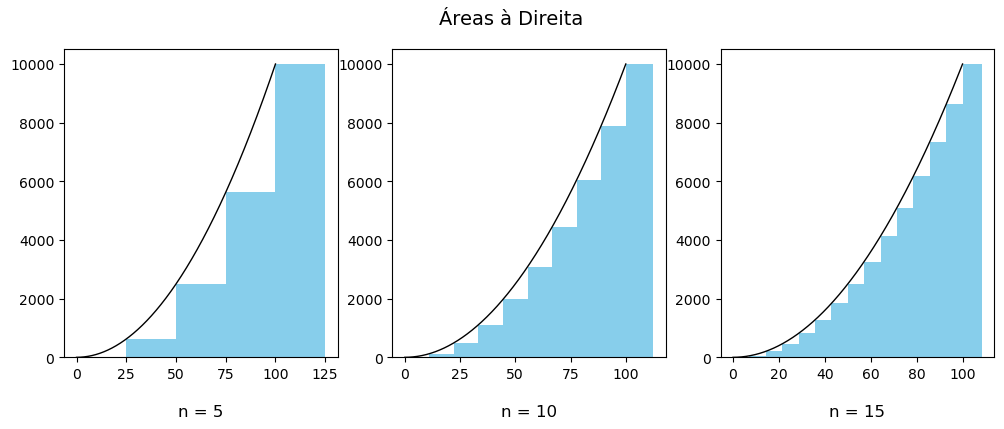

In [93]:
# À direita
plt.figure(figsize=(12,4))

plt.suptitle('Áreas à Direita \n', fontsize=14)

for i, x in enumerate(x_list):
    
    plt.subplot(1,3,i+1)
    plt.bar(x, funcao(x), width= 25 / (i+1), align='edge', color = 'skyblue')
    plt.plot(x_1000, funcao(x_1000), c = 'black', linewidth = 1)
    plt.xlabel(f'\nn = {len(x)}', fontsize=12)

### Simulando o valor da área

Abaixo podemos notar que a medida que aumentamos o número de colunas, há uma convergência entre a área calculada à direita e à esquerda para um dado valor que quando $\lim_{n\to \infty}$ tende ao verdadeiro valor da área da função. 

In [58]:
def areas(x):

    bases = np.diff(x)
  
    alturas_l = funcao(x[1:]) # esquerda (left)
    alturas_r = funcao(x[:-1]) # direita (right)

    areas_retangulos_l = bases * alturas_l
    areas_retangulos_r = bases * alturas_r

    area_total_l = np.sum(areas_retangulos_l)
    area_total_r = np.sum(areas_retangulos_r)
    
    return area_total_l, area_total_r

In [59]:
x_list = [x_5, x_10, x_15, x_100, x_1000, x_1000000]

df_areas = pd.DataFrame()

for i, x in enumerate(x_list):

    area_esquerda, area_direita = areas(x)
    
    df = pd.DataFrame({
        'Área Direita': [area_direita],
        'Área Esquerda': [area_esquerda]
    }, index=[f'x_{len(x)}'])  
    
    df_areas = pd.concat([df_areas, df])
    
df_areas

,Área Direita,Área Esquerda
x_5,218750.000000,468750.000000
x_10,279835.390947,390946.502058
x_15,298469.387755,369897.959184
x_100,328299.833350,338400.843451
x_1000,332832.999833,333834.000834
x_100000,333328.333300,333338.333400


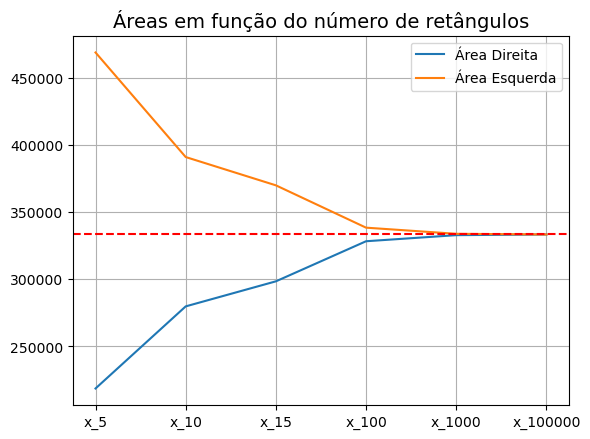

In [60]:
plt.title('Áreas em função do número de retângulos', fontsize = 14)

plt.plot(df_areas, label = df_areas.columns)
plt.axhline(df_areas.iloc[-1,:].mean(), color = 'red', linestyle = '--')

plt.legend()
plt.grid()

### Integral Definida

Podemos representar aquela fórmula apresentada acima como a integral definida de f dos intervalos [a, b] como: 

$$
\int_{a}^{b} f(x) dx = \lim_{n\to \infty} \sum_{i=1}^{n} f(x_{i}^{*}) \Delta x
$$

Segundo **Teorema Fundamental do Cálculo**, podemos calcular a integral de intervalores [a, b] da seguinte forma: 

$$
\int_{a}^{b} f(x) dx = F(b) - F(a)
$$

Onde F é a função primitiva de f(x), isto é, a função no qual ao ser derivada resulta em f(x), por exemplo, se $f(x) = x^2$, então F(x) é igual a $F(x) = \frac {x^3}{3}$. 

#### Exemplo: 

Se fossemos calcular a integral de [0, 100] de $f(x) = x^2$: 

$$
A = \int_{0}^{100} x^2 dx = \frac {x^3}{3} = \frac {100^3}{3} - \frac {0^3}{3} = 333333,33...
$$

In [61]:
# Solucionando com a função quad do scipy
from scipy.integrate import quad

# Prova real
quad(funcao, 0, 100)

(333333.3333333334, 3.7007434154171887e-09)

### Integral Indefinida

Enquanto a integral definida especifica o intervalo [a, b] e trata-se de um número em particular, a indefinida pode ser expresso como uma família de funções: 

$$
\int f(x) dx = F(x)
$$

Por exemplo, para $f(x) = x^2$, então a integral indefinida é: 

$$
\int f(x) dx = \frac {x^3}{3} + C
$$

In [68]:
x = sy.symbols('x')

f = x**2

sy.integrate(f, x)

x**3/3

### Regra de Substituição

A regra de substituição consiste em substituir elementos da função por uma variável (normalmente representada por *u*) que permite solucionar funções que não conseguiriam ser solucionadas simplesmente encontrando as primitivas. Para que a regra da função possa ser explicada, a função precisa poder ser expressa por: 

$$
\int f(g(x)) \ g'(x) \ dx = \int f(g(x)) + C
$$

#### Exemplo: 

$$
\int 2x \sqrt{1 + x^2} dx
$$

Se considerarmos $u = 1+x^2$ e derivarmos em função de x temos $\frac {du}{dx} = 2x$ que podemos representar como $du = 2x\ dx$, substituíndo temos: 

$$
\int \sqrt{u} \ du = \int u^{2/3} \ du = \frac {2}{3} \ u^{3/2} + C =  \frac {2}{3} \ (x^2 + 1)^{3/2} + C
$$

In [85]:
# Segundo a função encontrada pela regra de substituição, a área do intervalo [0, 10] seria igual a: 

A = (2/3) * (10**2 + 1) ** (3/2) - (2/3) * (0**2 + 1) ** (3/2)
A

676.0249584888066

In [86]:
# prova real
def funcao(x):
    return 2 * x * (1+x**2)**(1/2)

quad(funcao, 0, 10)zzz

(676.0249584888072, 5.464852444207128e-09)